In [78]:
import sys
print(f'Python binary: {sys.executable}')

Python binary: /opt/homebrew/Cellar/jupyterlab/4.0.3/libexec/bin/python3.11


In [71]:
data = pd.read_csv('2023-07-25.csv')
print(f'The data contains {len(data)} lines.')

The data contains 5301 lines.


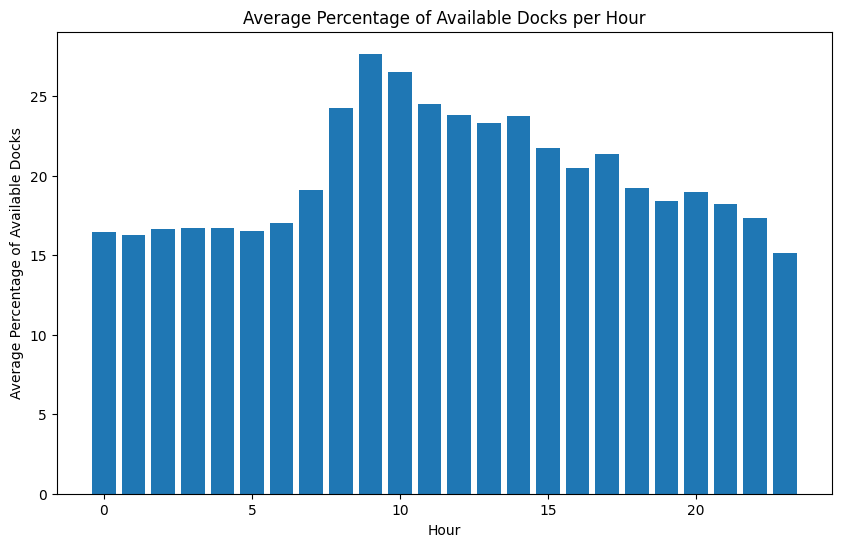

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Group by the 'Hour' column and calculate the average percentage of available docks
grouped_data = data.groupby('Hour')['PercentageAvailable'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Available Docks')
plt.title('Average Percentage of Available Docks per Hour')
plt.show()

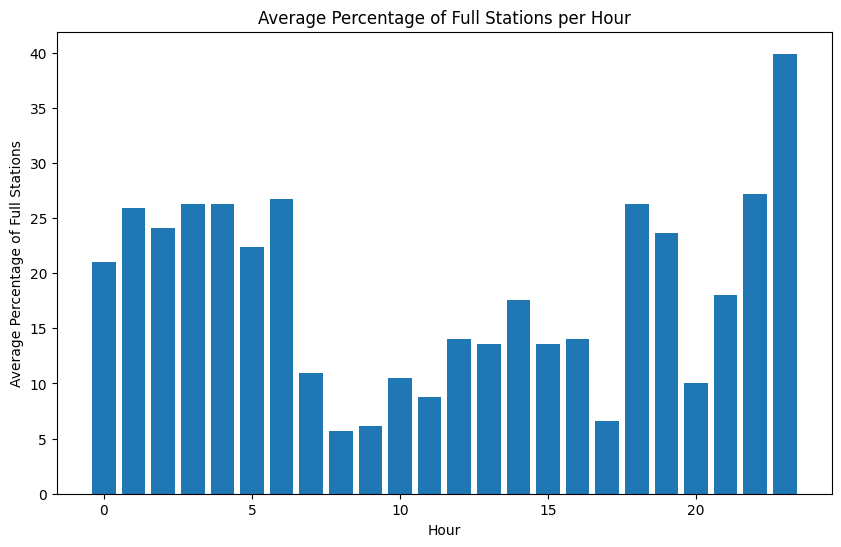

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

data['ZeroDocks'] = (data['DocksAvailable'] == 0).astype(int)
data['NumberOfStations'] = 1

grouped_data = data.groupby('Hour').agg({
    'ZeroDocks': 'sum', 
    'NumberOfStations': 'sum', 
    'TimeStamp': 'nunique'
})


# Calculate the percentage of full stations per hour
grouped_data['PercentageFullStations'] = (grouped_data['ZeroDocks'] / grouped_data['NumberOfStations']) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['PercentageFullStations'])
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Full Stations')
plt.title('Average Percentage of Full Stations per Hour')
plt.show()

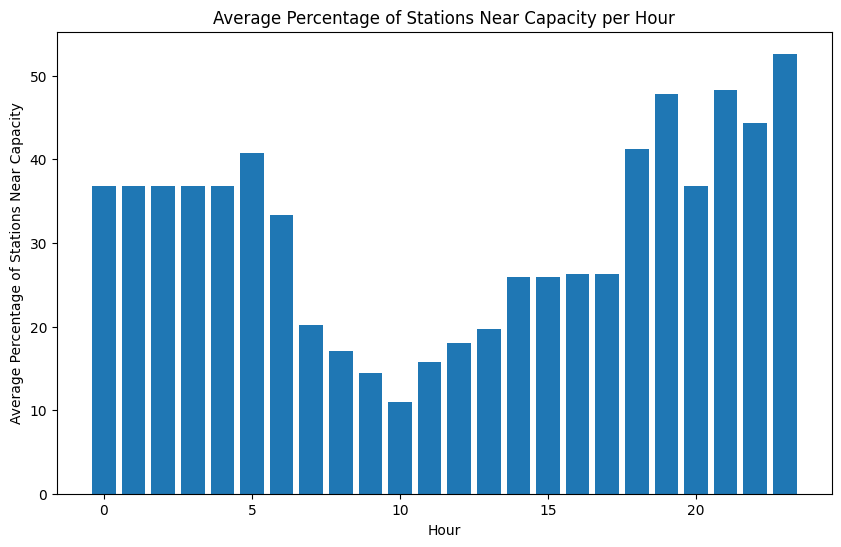

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

data['ZeroDocks'] = (data['DocksAvailable'] < 2).astype(int)
data['NumberOfStations'] = 1

grouped_data = data.groupby('Hour').agg({
    'ZeroDocks': 'sum', 
    'NumberOfStations': 'sum', 
    'TimeStamp': 'nunique'
})


# Calculate the percentage of stations "near capacity" per hour
grouped_data['PercentageFullStations'] = (grouped_data['ZeroDocks'] / grouped_data['NumberOfStations']) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['PercentageFullStations'])
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Stations Near Capacity')
plt.title('Average Percentage of Stations Near Capacity per Hour')
plt.show()

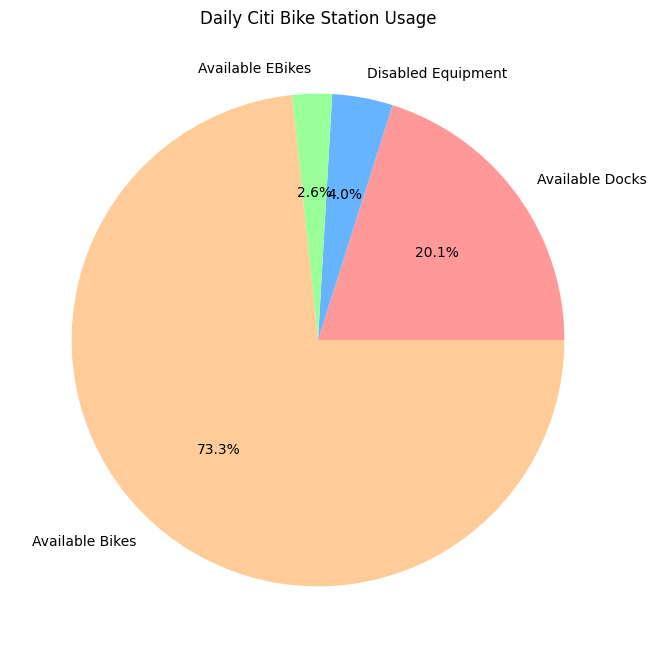

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Calculate the average percentage of available docks
average_percentage_available = data['PercentageAvailable'].mean()

# Calculate the average percentage of each category
average_percentage_disabled = (data['DocksDisabled'].sum() + data['BikesDisabled'].sum()) / data['TotalCapacity'].sum() * 100
average_percentage_ebikes_available = (data['EBikesAvailable'].sum() / data['TotalCapacity'].sum()) * 100
average_percentage_bikes_available = (data['BikesAvailable'].sum() / data['TotalCapacity'].sum()) * 100

# Define the data for the pie chart
sizes = [average_percentage_available, average_percentage_disabled, average_percentage_ebikes_available, average_percentage_bikes_available]
labels = ['Available Docks', 'Disabled Equipment', 'Available EBikes', 'Available Bikes']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Daily Citi Bike Station Usage')
plt.show()

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total number of usable docks for each timestamp
data['UsableDocks'] = data['DocksAvailable'] - data['DocksDisabled']

# Group by the 'Name' column and calculate the average number of usable docks
grouped_data = data.groupby('Name')['UsableDocks'].mean()

# Sort the data in ascending order to get the stations with the lowest number of available docks
sorted_data = grouped_data.sort_values()

# Convert the sorted data to a DataFrame
result = pd.DataFrame(sorted_data).reset_index()

# Rename the columns
result.columns = ['Station', 'Average Available Docks']

# Convert the sorted data to a DataFrame and remove the index
result = pd.DataFrame(sorted_data).reset_index()
result.index += 1

# Rename the columns
result.columns = ['Station', 'Average Available Docks']

# Display the result
print('Stations with the Least Available Docks')
print('-'*50)
print(result.to_string(index=False))

Stations with the Least Available Docks
--------------------------------------------------
                   Station  Average Available Docks
    Clinton St & Centre St                 0.329749
   Dwight St & Van Dyke St                 1.010753
    Wolcott St & Dwight St                 1.354839
         Henry St & W 9 St                 1.401434
Sigourney St & Columbia St                 1.448029
      Columbia St & W 9 St                 2.372760
  Carroll St & Columbia St                 2.526882
   Columbia St & Degraw St                 2.806452
 Pioneer St & Van Brunt St                 3.060932
         Henry St & Bay St                 3.222222
         Bay St & Court St                 3.487455
Commerce St & Van Brunt St                 3.673835
 Van Brunt St & Wolcott St                 4.408602
Van Brunt St & Van Dyke St                 4.770609
    Coffey St & Conover St                 7.526882
  Richards St & Delavan St                 8.028674
  Pioneer St & Richards S